The autos.csv dataset is a comprehensive collection of valuable data about used cars, and provides insight into how the cars are being sold, what price they are being sold for, and all the details about their condition. 

imports all necessary libraries

In [1]:
#Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold

#Algorithms
from sklearn.linear_model import LinearRegression

#Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pingouin as pg
import statsmodels.formula.api as smf
import statsmodels.api as sm


Data Loading 

Load the used cars dataset & Display a summary of the DataFrame

In [2]:
# read Used Cars Sales csv 
location = "D:\Business Technology\Level 3\Semester 1\Data Analysis for Business Application\Project\Raw data\Raw Data\Autos.csv"
df = pd.read_csv(location) 
df.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Prints a summary of the DataFrame structure, data types, and non-null counts.
missing data: vehicleType, gearbox, model, fuelType, and notRepairedDamage.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

Generates descriptive statistics for all columns, including categorical ones
price has extreme outliers
yearOfRegistration has unrealistic values (min 1000, max 9999).
powerPS has high variance and unrealistic max values (20,000).
nrOfPictures is zero for all rows and should be dropped

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,371528.0,NaN,NaN,NaN,185763.5,107251.039743,0.0,92881.75,185763.5,278645.25,371527.0
dateCrawled,371528,280500,2016-03-24 14:49:47,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,371528,233531,Ford_Fiesta,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller,371528,2,privat,371525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
offerType,371528,2,Angebot,371516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,371528.0,NaN,NaN,NaN,17295.141865,3587953.74441,0.0,1150.0,2950.0,7200.0,2147483647.0
abtest,371528,2,test,192585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vehicleType,333659,8,limousine,95894,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearOfRegistration,371528.0,NaN,NaN,NaN,2004.577997,92.866598,1000.0,1999.0,2003.0,2008.0,9999.0
gearbox,351319,2,manuell,274214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculates the exact count of missing values per column
notRepairedDamage      72060
vehicleType            37869
fuelType               33386
model                  20484
gearbox                20209

In [5]:
df.isnull().sum()

index                      0
dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

print rows by column

In [6]:
df.shape

(371528, 21)

EDA

The histogram reveals a highly right-skewed distribution of car prices.
Most observations are concentrated at very low price values

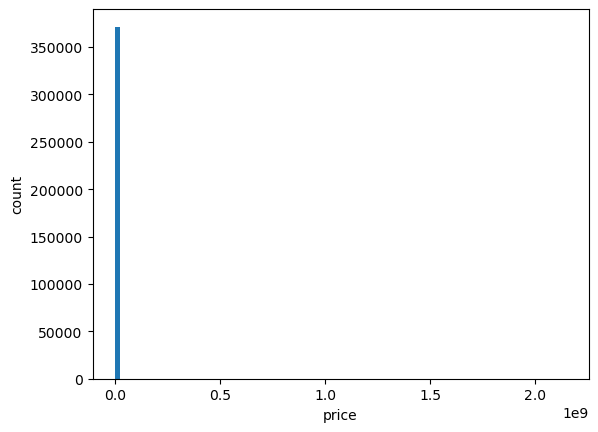

In [7]:
plt.hist(df['price'], bins=100)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

Correlation Heatmap
There is no significant correlation caused by outliers and missing

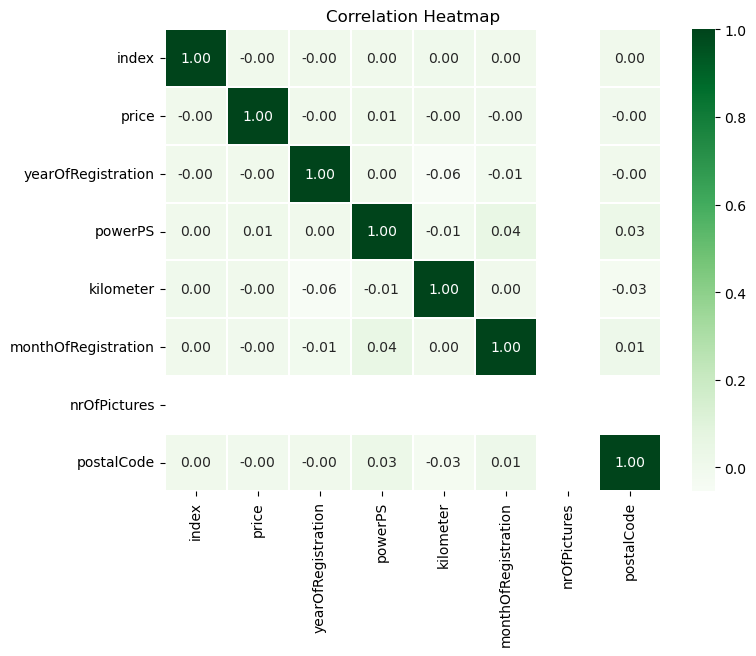

In [8]:
numeric_cols = df.select_dtypes(include=['float64','int64','int32'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()

Box plot for the entire price column
Shows a high degree of outliers

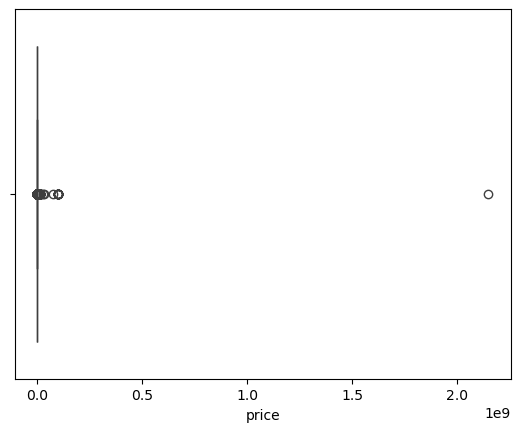

In [9]:
sns.boxplot(data=df , x='price')
plt.show()

A loop that iterates through all numerical columns plots a separate box plot for each one using
-Problems
1-price: Extreme Outlier
2-yearOfRegistration: Unrealistic Boundary Values
3-powerPS: Extreme Outlier
4=kilometer: slight skewness


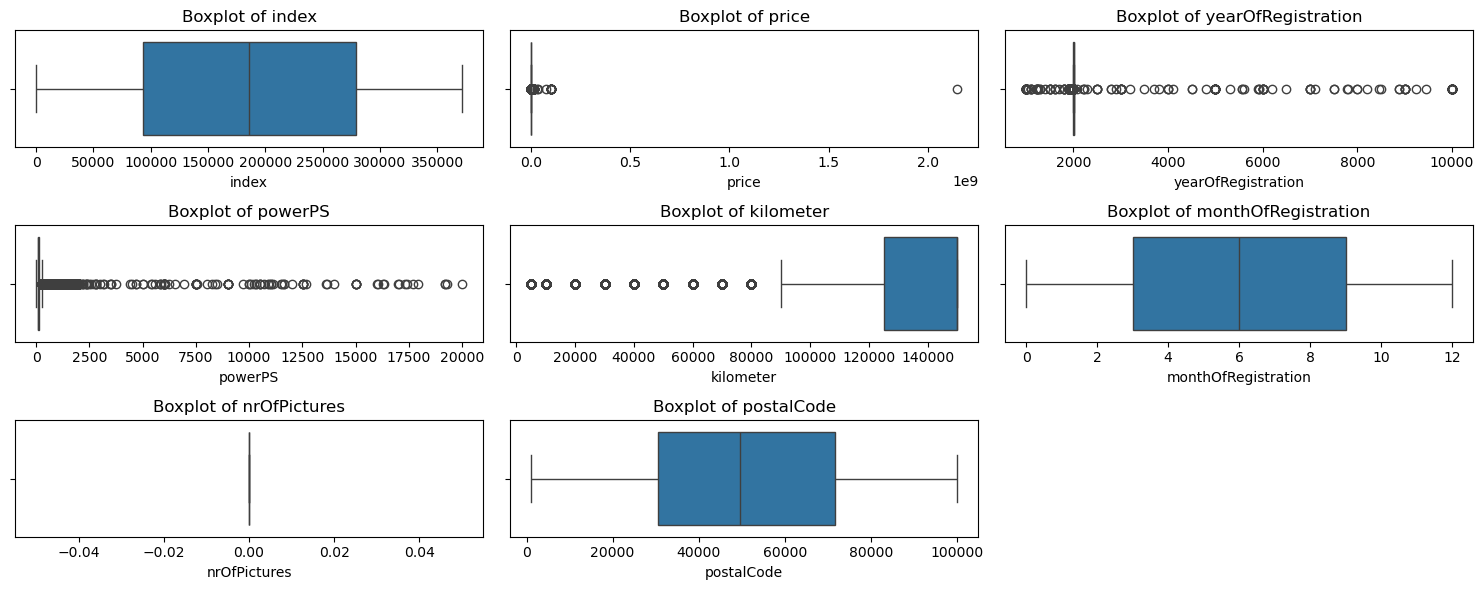

In [10]:
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = 3  
n_rows=3
plt.figure(figsize=(15, 6))

for i in range(len(numerical_cols)):  
    col = numerical_cols[i] 
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

A loop that plots the distribution of every numerical column using histogram
price: Highly Skewed (Right)
powerPS: Highly Skewed (Right)
kilometer: Skewed (Left)
yearOfRegistration: skewed (Right)

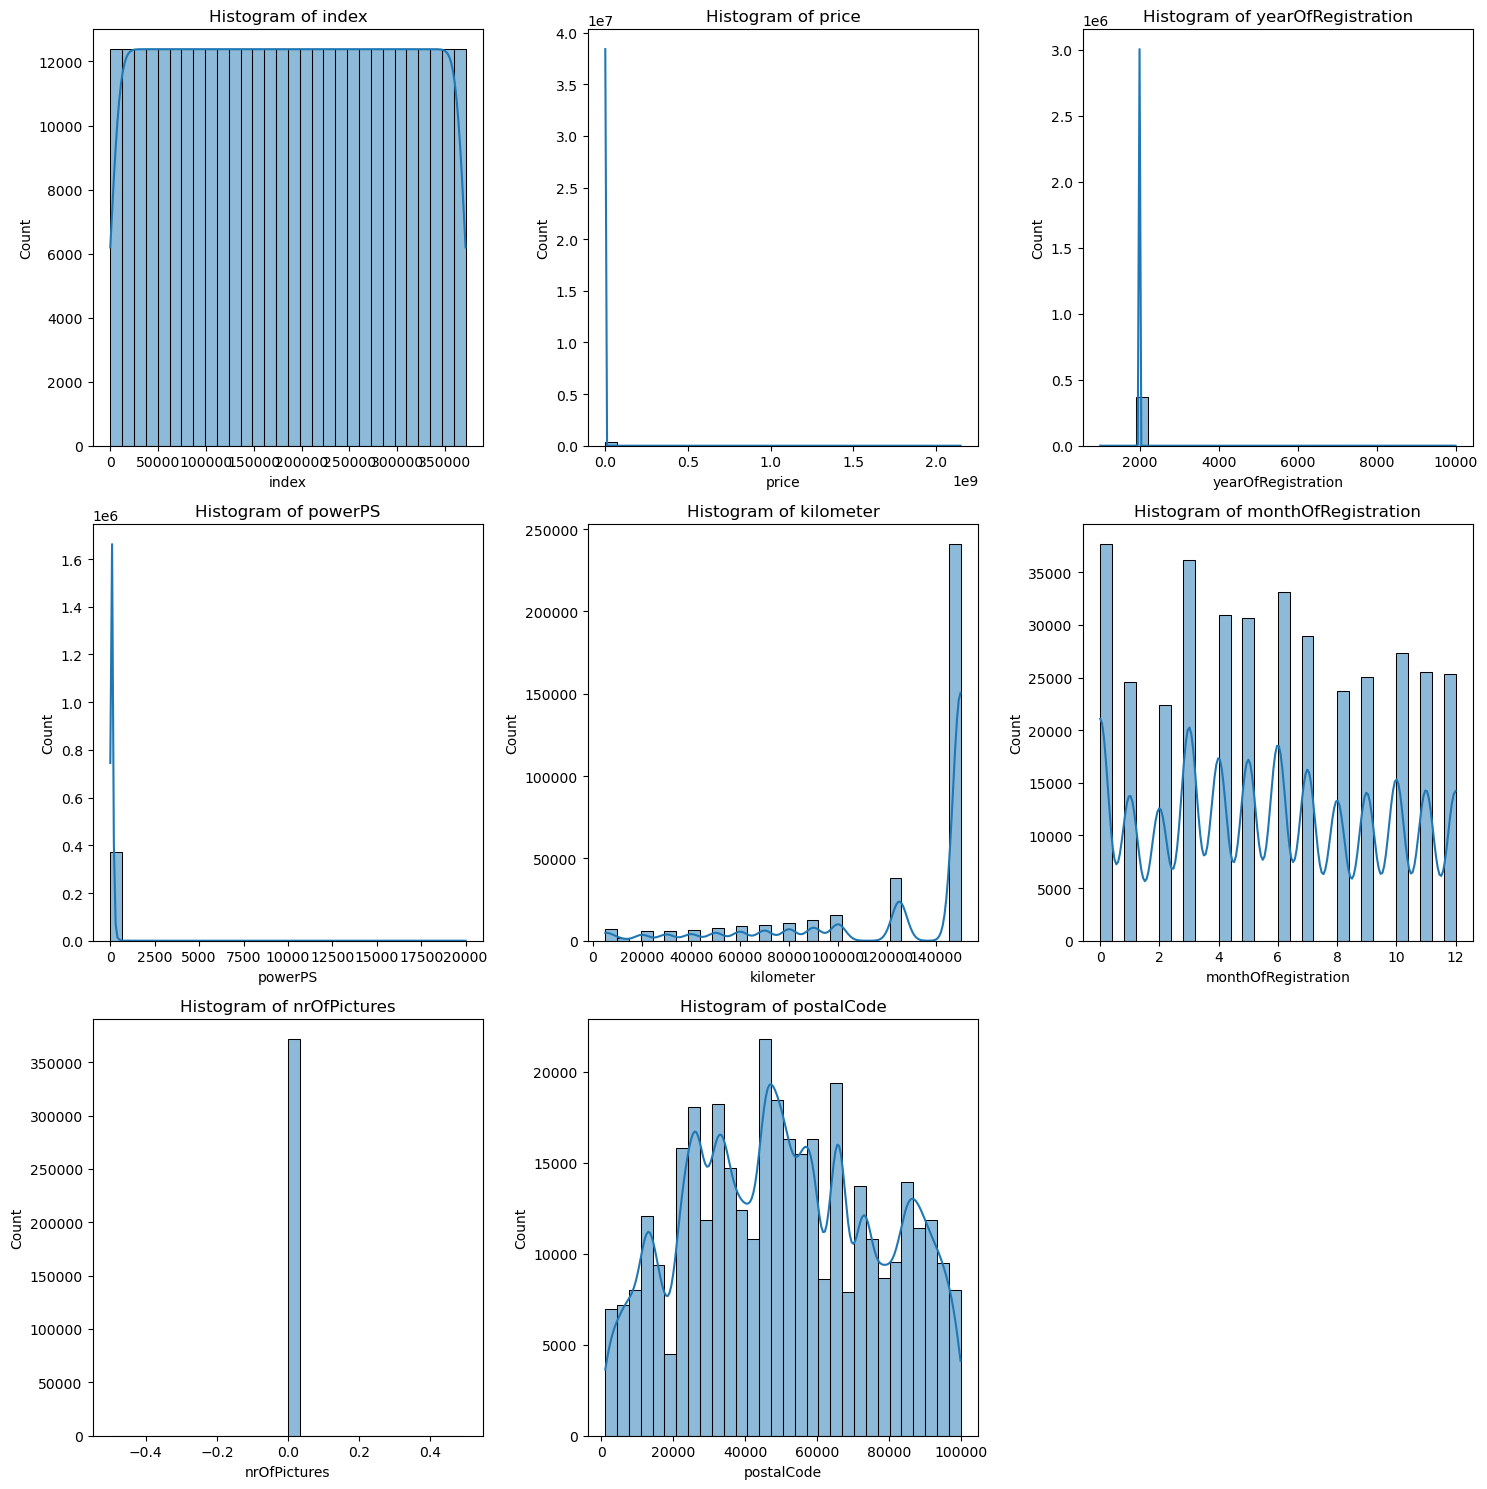

In [11]:
numerical_cols = df.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Preprocessing

Created a copy of the data under clean_df

In [12]:
clean_df = df.copy()

Dropped unusable columns

In [13]:
clean_df.drop(['postalCode', 'dateCreated', 'lastSeen','dateCrawled','nrOfPictures','name'], axis=1, inplace=True)

Printed the remaining columns

In [14]:
clean_df.columns

Index(['index', 'seller', 'offerType', 'price', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage'],
      dtype='object')

Checked for duplicates in columns: 0

In [15]:
print(clean_df.duplicated().sum())

0


Counted the NaN count in price column
Counted the number of rows that = 0; 10778 rows

In [16]:
print("price NaN:", clean_df['price'].isna().sum())
print("price == 0:", (clean_df['price']==0).sum())

price NaN: 0
price == 0: 10778


This summary helps identify which variables require imputation or special handling before further analysis and model training.

In [17]:
clean_df.isna().sum()

index                      0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

Calculated the missing value % for each column

In [18]:
for col in clean_df.columns:
    missing = clean_df[col].isna().sum()
    if missing > 0:
        pct = round(missing / len(clean_df) * 100, 2)
        print(f"{col} has {pct} % missing values")

vehicleType has 10.19 % missing values
gearbox has 5.44 % missing values
model has 5.51 % missing values
fuelType has 8.99 % missing values
notRepairedDamage has 19.4 % missing values


A loop that iterates through all columns with the object data type, 
prints the column name, and displays all unique values in that column.

In [19]:
for col in clean_df.select_dtypes(include=['object']):
    print(col, '\n')
    print(clean_df[col].unique())
    print('_' * 100)

seller 

['privat' 'gewerblich']
____________________________________________________________________________________________________
offerType 

['Angebot' 'Gesuch']
____________________________________________________________________________________________________
abtest 

['test' 'control']
____________________________________________________________________________________________________
vehicleType 

[nan 'coupe' 'suv' 'kleinwagen' 'limousine' 'cabrio' 'bus' 'kombi'
 'andere']
____________________________________________________________________________________________________
gearbox 

['manuell' 'automatik' nan]
____________________________________________________________________________________________________
model 

['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_kl

Displays the data type for each column in the dataframe

In [20]:
clean_df.dtypes

index                   int64
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

iterates through every column of type object (categorical) in the clean_df. If a column has any missing values (missing > 0), it calculates the mode  and fills all NaN values in that column with the calculated mode.

In [21]:
object_cols = clean_df.select_dtypes(include=['object']).columns

# Exclude notRepairedDamage to handle it separately using KNN imputation
object_cols = object_cols.drop('notRepairedDamage')

for col in object_cols:
    missing = clean_df[col].isna().sum()
    if missing > 0:
        mode_value = clean_df[col].mode()[0]
        clean_df[col] = clean_df[col].fillna(mode_value)


Outlier Removal: This caps the upper limit of the horsepower to 750 & lower limit of the horsepower to 5.

In [22]:
def winsorize(clean_df, column, lower_bound, upper_bound):
    clean_df[column] = np.where(clean_df[column] < lower_bound,
                           lower_bound,
                           clean_df[column])

    clean_df[column] = np.where(clean_df[column] > upper_bound,
                           upper_bound,
                           clean_df[column])
    return clean_df

In [23]:
clean_df = winsorize(clean_df,
                      column='powerPS',
                      lower_bound=5,
                      upper_bound=750)
clean_df['powerPS'].describe()

count    371528.000000
mean        113.197051
std          72.543174
min           5.000000
25%          70.000000
50%         105.000000
75%         150.000000
max         750.000000
Name: powerPS, dtype: float64

Uses KNNImputer to impute missing values for kilometer, and yearOfRegistration 
based on how similar other cars are across several features.

In [24]:
knn_df = clean_df.copy()

mapping = {"nein": 0, "ja": 1}
knn_df["notRepairedDamage"] = knn_df["notRepairedDamage"].map(mapping)

imp = SimpleImputer(strategy="most_frequent")
knn_df["notRepairedDamage"] = imp.fit_transform(knn_df[["notRepairedDamage"]])

cols_for_knn = ["powerPS", "kilometer", "yearOfRegistration"]

imputer = KNNImputer(n_neighbors=5, weights='distance')
clean_df[cols_for_knn] = imputer.fit_transform(knn_df[cols_for_knn])

reverse_mapping = {0: "nein", 1: "ja"}
clean_df["notRepairedDamage"] = knn_df["notRepairedDamage"].round().map(reverse_mapping)

Calculates the ratio of cars that have "no unrepaired damage" ('nein') to the total number of cars

In [25]:
print(round(((clean_df['notRepairedDamage'] == 'nein').sum())/ len(clean_df) * 100, 2), " %")

90.23  %


numerically confirm the magnitude of the outlier problem in the price column

In [26]:
price = clean_df["price"]
Q1 = np.quantile(price,0.25)
Q3 = np.quantile(price,0.75)
IQR = Q3 - Q1
upper_bound = Q3 + (1.5 * IQR)
lower_bound = Q1 - (1.5 * IQR)
outliers = price[(price <= lower_bound)|(price >= upper_bound)]
outliers.count()
print(outliers.count() / len(clean_df) * 100)

7.565513231842553


Removes extreme values in the price variable using the Interquartile Range (IQR) method.

In [27]:
clean_df = clean_df[(clean_df["price"] >= lower_bound) &(clean_df["price"] <= upper_bound)]

Filtering: This line filters the clean_df DataFrame to keep only those rows where the price column is not equal to zero
Then Checks the count of zero prices remaining in the price

In [28]:
clean_df = clean_df[clean_df['price'] != 0 ].reset_index(drop = True)
print('Zeros in price colmun: ',(clean_df['price'] == 0).sum())

Zeros in price colmun:  0


cleans the yearOfRegistration variable by extracting valid year values, converting them to numeric format, and removing unrealistic entries.

In [29]:
clean_df['yearOfRegistration'] = (clean_df['yearOfRegistration'].astype(str).str.extract(r'(\d{4})')[0])
clean_df['yearOfRegistration'] = pd.to_numeric(clean_df['yearOfRegistration'], errors='coerce')

now_year = pd.Timestamp.now().year

clean_df.loc[(clean_df['yearOfRegistration'] < 1900) | 
       (clean_df['yearOfRegistration'] > now_year), 'yearOfRegistration'] = pd.NA

print("Invalid years cleaned!")
clean_df['yearOfRegistration'].describe()
clean_df.info()

Invalid years cleaned!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332642 entries, 0 to 332641
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                332642 non-null  int64  
 1   seller               332642 non-null  object 
 2   offerType            332642 non-null  object 
 3   price                332642 non-null  int64  
 4   abtest               332642 non-null  object 
 5   vehicleType          332642 non-null  object 
 6   yearOfRegistration   332507 non-null  float64
 7   gearbox              332642 non-null  object 
 8   powerPS              332642 non-null  float64
 9   model                332642 non-null  object 
 10  kilometer            332642 non-null  float64
 11  monthOfRegistration  332642 non-null  int64  
 12  fuelType             332642 non-null  object 
 13  brand                332642 non-null  object 
 14  notRepairedDamage    332642 non-null  object 

Missing registration years are estimated based on the car's brand

In [30]:
med_by_brand = clean_df.groupby('brand')['yearOfRegistration'].median()
clean_df['yearOfRegistration'] = clean_df['yearOfRegistration'].fillna(
    clean_df['brand'].map(med_by_brand)
    ).fillna(clean_df['yearOfRegistration'].median())

In [31]:
clean_df.isna().sum()

index                  0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

Feature Engineering

Calculates a new age column by subtracting the car's registration year from the current year (2025)
realistic boundaries: setting ages less than 0 or greater than 125 years

In [32]:
current_Year = 2025
clean_df['age'] = current_Year - clean_df['yearOfRegistration'] 

converts the age column to the Int64 data type.

In [33]:
clean_df['age'] = clean_df['age'].astype('Int64')

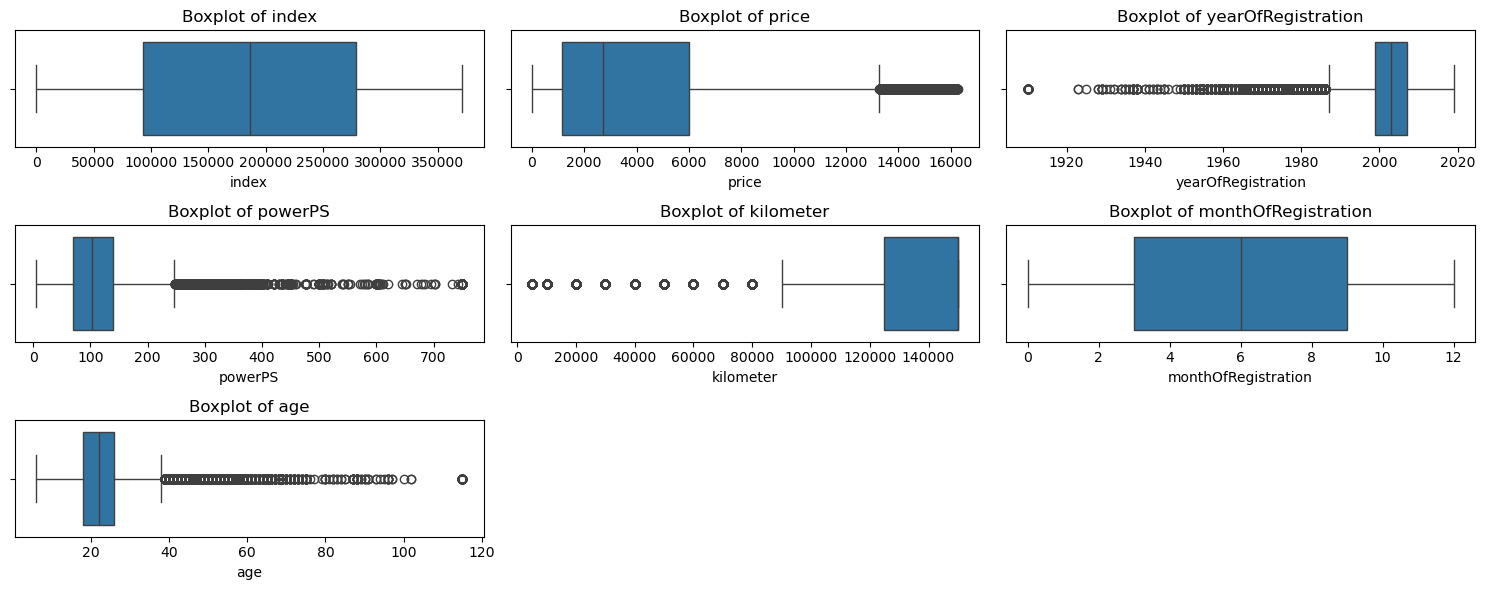

In [34]:
numerical_cols = clean_df.select_dtypes(include=np.number).columns
n_cols = 3  
n_rows=3
plt.figure(figsize=(15, 6))

for i in range(len(numerical_cols)):  
    col = numerical_cols[i] 
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=clean_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Transformation

This generates the scatter plot to visualize the relationship between age and log-transformed price.
price distribution was highly skewed (skewed right) its slightly fixed

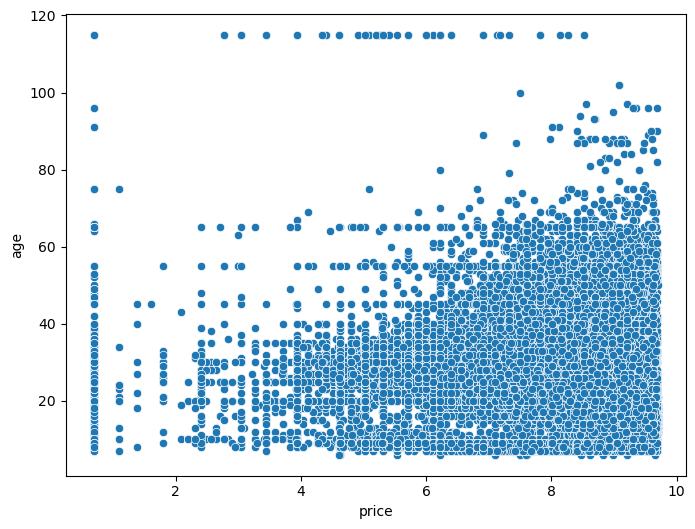

In [35]:
plt.figure(figsize=(8,6))
sns.scatterplot(data= clean_df ,x = np.log1p(clean_df['price'].dropna()), y = clean_df['age'])
plt.show()

randomly selects and prints 10 values from the price column

In [36]:
print(clean_df['price'].sample(10))

46401       750
241666    11300
169421     6490
312540     2600
177332     1600
267452     2750
165257    13900
315068      650
116091    14500
220244      900
Name: price, dtype: int64


categorical feature notRepairedDamage converted into a numerical format

In [37]:
le = LabelEncoder()
clean_df["notRepairedDamage"]=le.fit_transform(clean_df["notRepairedDamage"])
clean_df

,index,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,age
0,0,privat,Angebot,480,test,limousine,1993.0,manuell,5.0,golf,150000.0,0,benzin,volkswagen,1,32
1,2,privat,Angebot,9800,test,suv,2004.0,automatik,163.0,grand,125000.0,8,diesel,jeep,1,21
2,3,privat,Angebot,1500,test,kleinwagen,2001.0,manuell,75.0,golf,150000.0,6,benzin,volkswagen,1,24
3,4,privat,Angebot,3600,test,kleinwagen,2008.0,manuell,69.0,fabia,90000.0,7,diesel,skoda,1,17
4,5,privat,Angebot,650,test,limousine,1995.0,manuell,102.0,3er,150000.0,10,benzin,bmw,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332637,371521,privat,Angebot,1150,control,bus,2000.0,manuell,5.0,zafira,150000.0,3,benzin,opel,1,25
332638,371523,privat,Angebot,2200,test,limousine,2005.0,manuell,5.0,golf,20000.0,1,benzin,sonstige_autos,1,20
332639,371524,privat,Angebot,1199,test,cabrio,2000.0,automatik,101.0,fortwo,125000.0,3,benzin,smart,1,25
332640,371525,privat,Angebot,9200,test,bus,1996.0,manuell,102.0,transporter,150000.0,3,diesel,volkswagen,1,29


In [38]:
clean_df['log_price'] = np.log1p(clean_df['price'])

In [39]:
clean_df.dtypes

index                    int64
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration     float64
gearbox                 object
powerPS                float64
model                   object
kilometer              float64
monthOfRegistration      int64
fuelType                object
brand                   object
notRepairedDamage        int64
age                      Int64
log_price              float64
dtype: object

No significant relation useful for a regression model

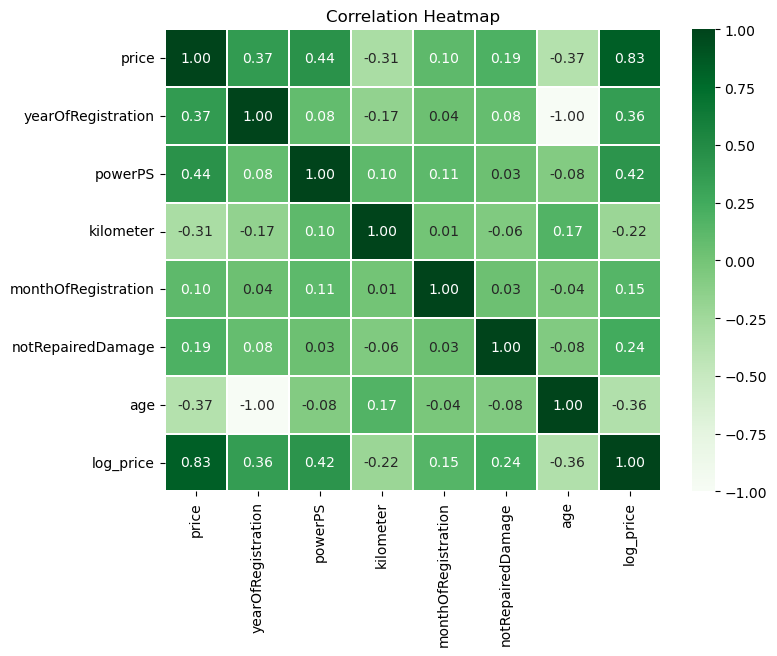

In [40]:
numeric_cols = clean_df.select_dtypes(include=['float64','int64','int32'])
corr_matrix = numeric_cols.drop(columns=['index'], errors='ignore').corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.2)
plt.title("Correlation Heatmap")
plt.show()


log-transformed price is Strongly and positively correlated with Power_per_Age(0.67), moderately and positively correlated with Power_Value_Combo (0.59) and Brand_Model_Value (0.56), but is negatively correlated with the car's age (-0.58) and kilometer (-0.39).

>>> Spearman Correlation with Target Price (LOOCV Encoded):
price                  1.000000
log_price              1.000000
Power_per_Age          0.626761
yearOfRegistration     0.556688
powerPS                0.499844
Brand_Model_Value      0.499684
notRepairedDamage      0.242219
monthOfRegistration    0.135745
index                 -0.000742
kilometer             -0.304069
age                   -0.556688
Name: price, dtype: float64


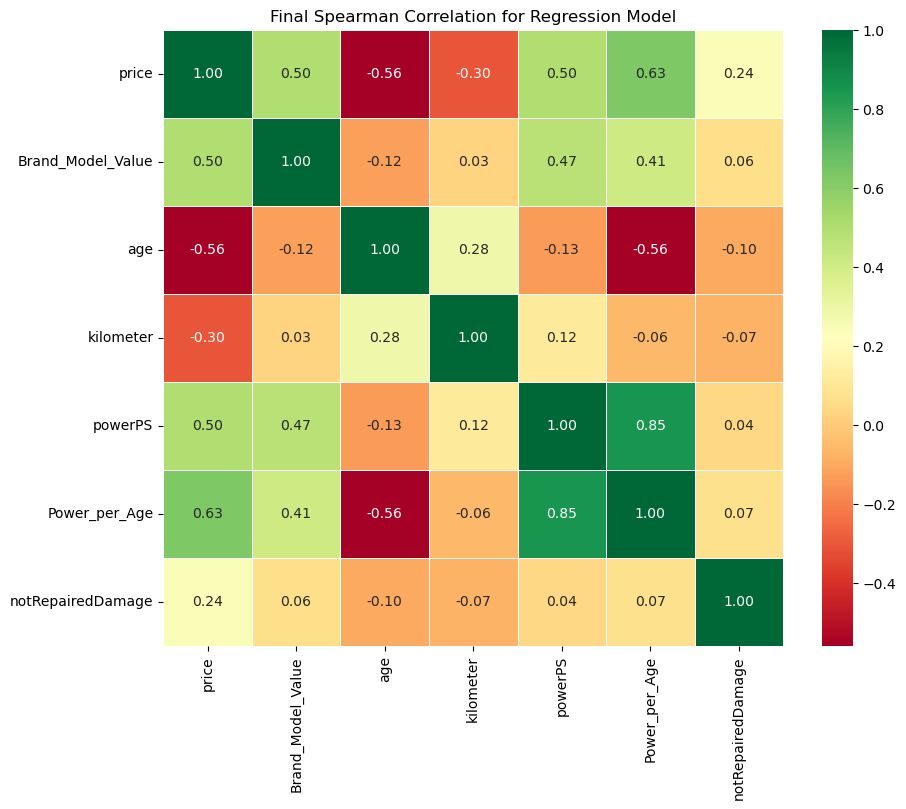

In [41]:
df_final = clean_df.copy()

df_final['Power_per_Age'] = df_final['powerPS'] / df_final['age'].replace(0, 1)

# 1. Calculate Group Sum and Count
grouped_stats = df_final.groupby(['brand', 'model'])['price'].agg(['sum', 'count']).reset_index()
grouped_stats.columns = ['brand', 'model', 'Group_Sum', 'Group_Count']
df_final = df_final.merge(grouped_stats, on=['brand', 'model'], how='left')

# 2. Calculate the LOOCV Mean (Mean excluding the current row's price)
df_final['Brand_Model_Value'] = (df_final['Group_Sum'] - df_final['price']) / (df_final['Group_Count'] - 1)

# Fill cases where Group_Count is 1 (no other cars in group) or zero denominator with the Global Mean
global_median = df_final['price'].median()
df_final['Brand_Model_Value'] = df_final['Brand_Model_Value'].fillna(global_median)
df_final.loc[df_final['Group_Count'] <= 1, 'Brand_Model_Value'] = global_median

# Drop intermediate columns
df_final.drop(columns=['Group_Sum', 'Group_Count'], inplace=True)

# 3. CORRELATION ASSESSMENT (Spearman Rank)
# Select only numerical columns
numerical_cols = df_final.select_dtypes(include=np.number)

# Calculate Spearman Correlation Matrix
corr_matrix = numerical_cols.corr(method='spearman')

# Extract correlation with Price
target_corr = corr_matrix['price'].sort_values(ascending=False)

print(">>> Spearman Correlation with Target Price (LOOCV Encoded):")
print(target_corr)

top_features = ['price', 'Brand_Model_Value', 'age', 'kilometer', 'powerPS', 'Power_per_Age', 'notRepairedDamage']
final_heatmap_data = df_final[top_features].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(
    final_heatmap_data,
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Final Spearman Correlation for Regression Model")
plt.show()

Models

All  string features are converted into binary dummy variables

In [42]:
df_final.drop(['powerPS', 'yearOfRegistration','model','brand','abtest','monthOfRegistration','age','index','log_price'], axis=1, inplace=True)

In [43]:
df_final.columns

Index(['seller', 'offerType', 'price', 'vehicleType', 'gearbox', 'kilometer',
       'fuelType', 'notRepairedDamage', 'Power_per_Age', 'Brand_Model_Value'],
      dtype='object')

Low-cardinality categorical variables were encoded using one-hot encoding, while high-cardinality features were handled separately to prevent dimensionality explosion and overfitting

In [44]:
gg = df_final.copy()
target = 'price'
low_card_cols = ['seller','offerType','vehicleType','gearbox','fuelType']
global_mean = gg[target].mean()

gg = pd.get_dummies(gg, columns=low_card_cols, drop_first=True)

print(gg.shape)

(332642, 21)


In [45]:
X = gg.drop(columns=['price'])
y = gg['price']

Started training the data & splitted the data 80% training & 20% test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [47]:
gg.dtypes

price                       int64
kilometer                 float64
notRepairedDamage           int64
Power_per_Age             Float64
Brand_Model_Value         float64
seller_privat                bool
offerType_Gesuch             bool
vehicleType_bus              bool
vehicleType_cabrio           bool
vehicleType_coupe            bool
vehicleType_kleinwagen       bool
vehicleType_kombi            bool
vehicleType_limousine        bool
vehicleType_suv              bool
gearbox_manuell              bool
fuelType_benzin              bool
fuelType_cng                 bool
fuelType_diesel              bool
fuelType_elektro             bool
fuelType_hybrid              bool
fuelType_lpg                 bool
dtype: object

 trains a Linear Regression model on the prepared data and then evaluates its performance using the R^2 score 
 no overfitting and has a moderate R^2 score of 55%

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

Train score: 0.5543657699719797
Test score: 0.5569700916921916


The Durbin_Watson statistic is approximately 2, suggesting that the residuals are independent and no autocorrelation is present.

In [49]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

np.float64(2.0004779165780957)

Model Assumptions are Violated: The residuals show heteroscedasticity

Train score: 0.5543657699719797
Test score: 0.5569700916921916


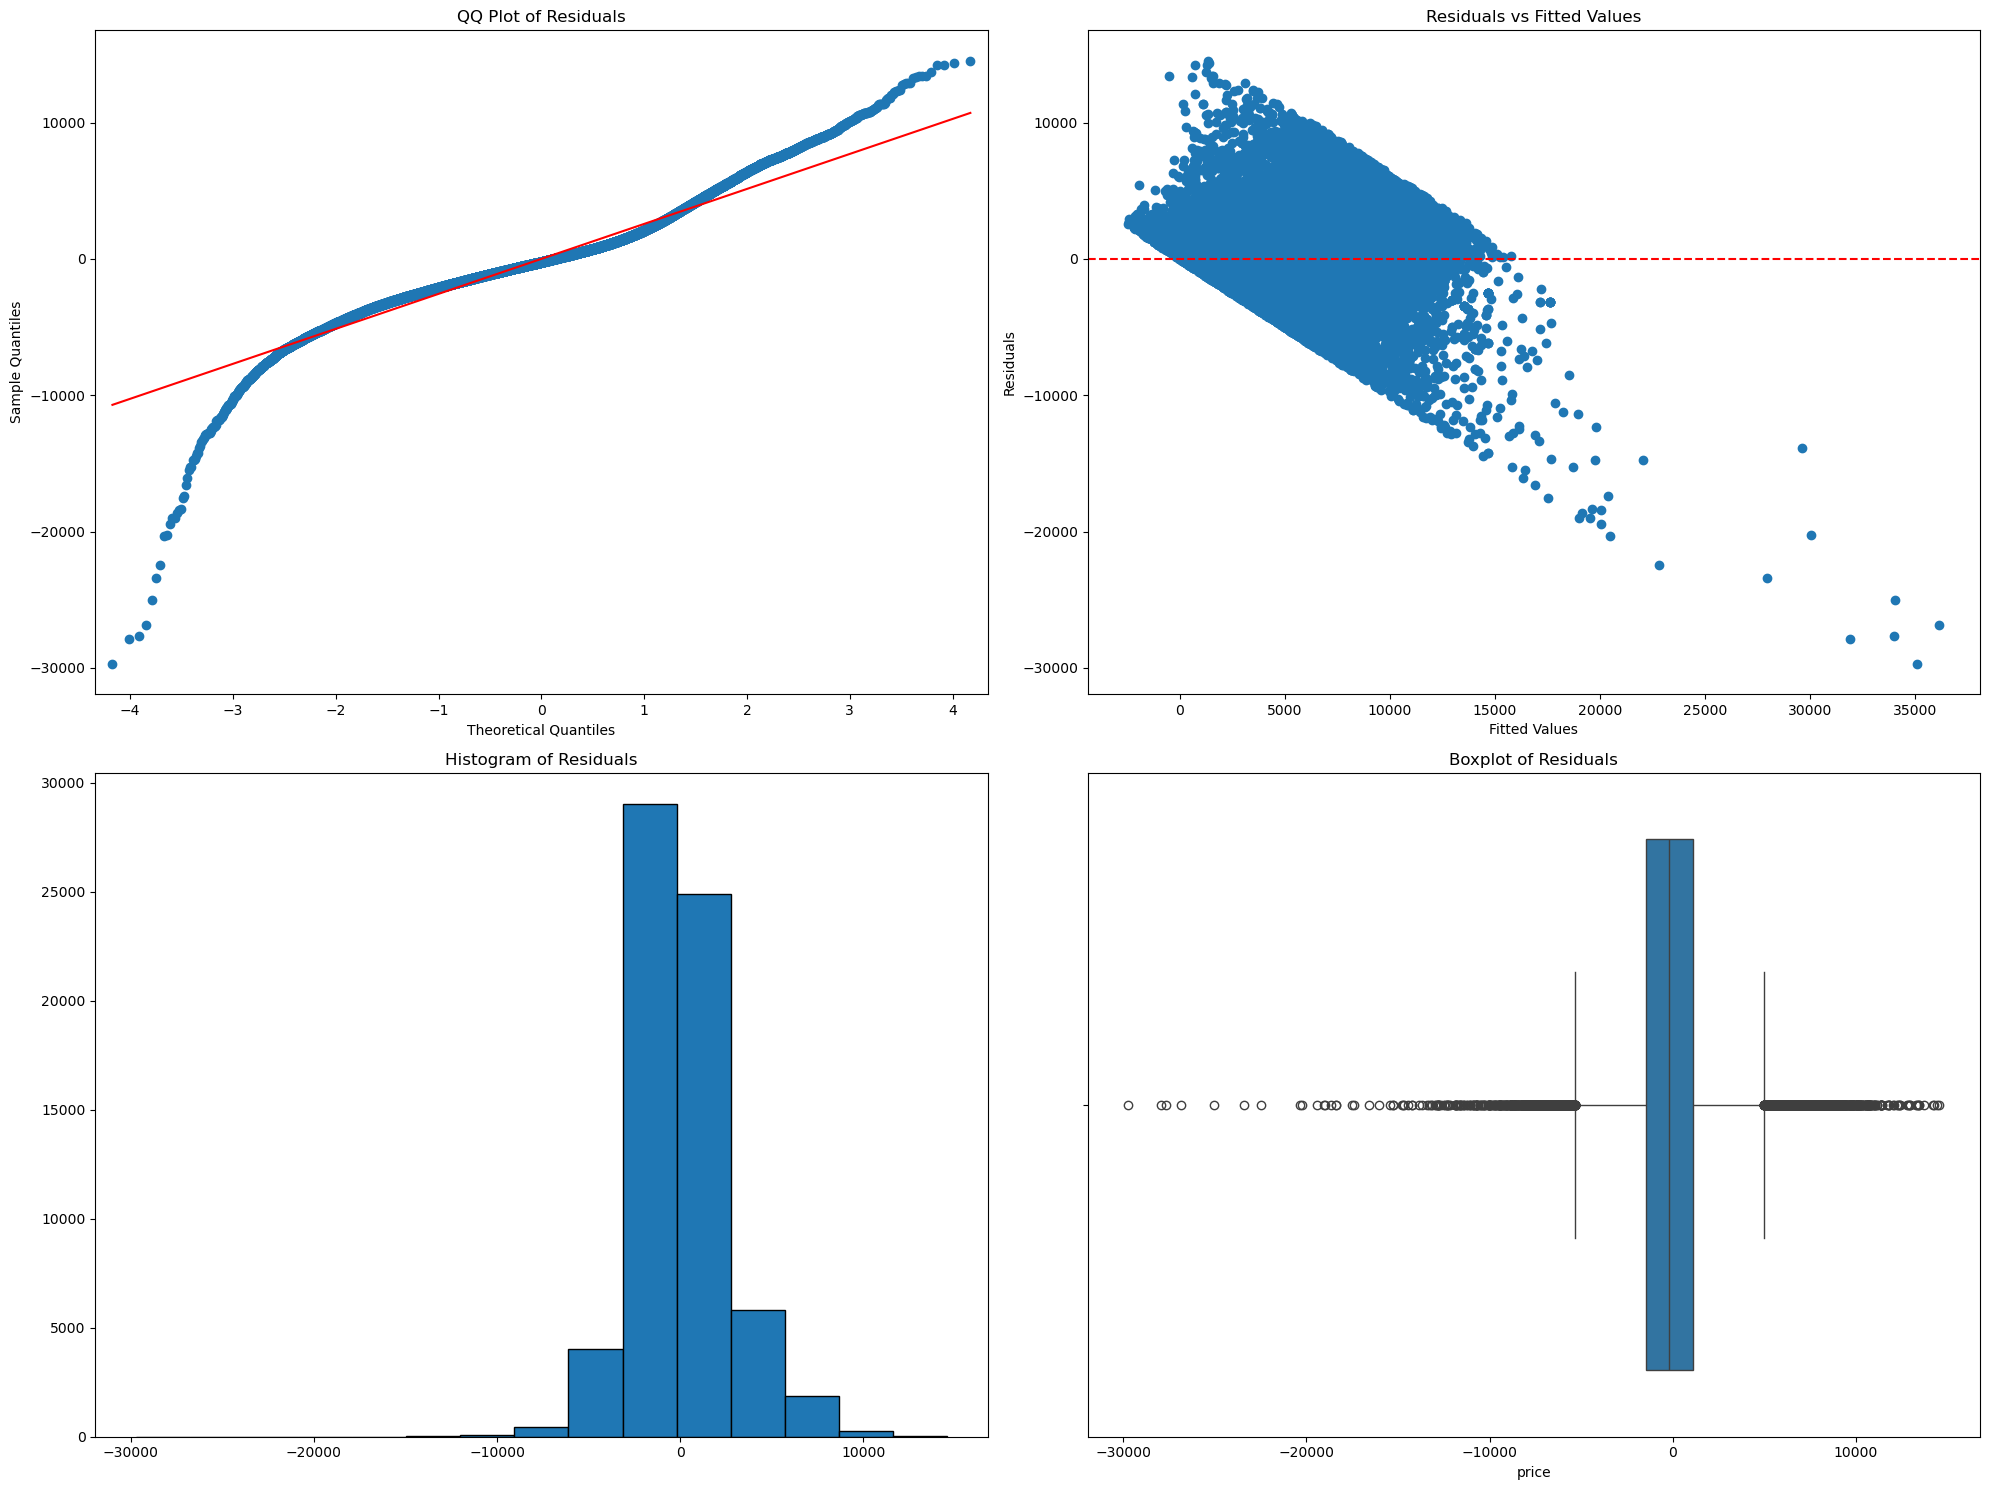

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Train score:", model.score(X_train, y_train))
print("Test score:", model.score(X_test, y_test))

residuals = y_test - y_pred
fitted = y_pred

fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# QQ Plot
sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

# Residuals vs Fitted
axs[0,1].scatter(fitted, residuals)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

# Histogram
axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

# Boxplot
sns.boxplot(x=residuals, ax=axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


the model performs reasonably well for predicting the majority of car prces

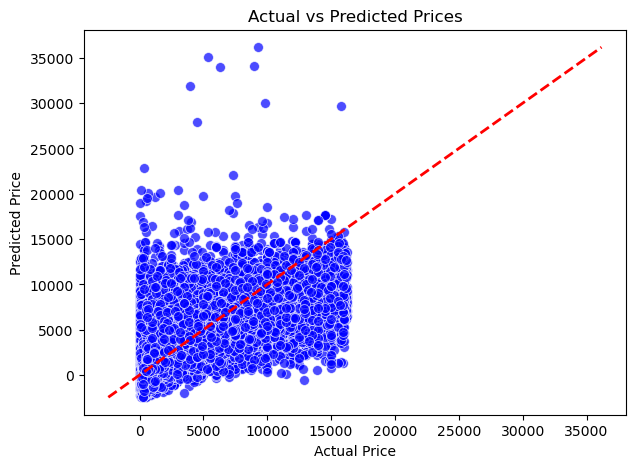

In [51]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred.flatten(), color='blue', s=50, alpha=0.7)

max_val = max(max(y_test.values), max(y_pred))
min_val = min(min(y_test.values), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

The linear regression model shows moderate performance, explaining about 56% of the variance in used car prices. The similarity between training and testing R² scores indicates good generalization with no overfitting. The average prediction error (MAE ≈ 1,844) is reasonable given the variability in used car prices, making the model a solid baseline for price prediction.

In [52]:
from sklearn.model_selection import KFold,cross_val_predict
kfold=KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()

y_pred = cross_val_predict(model, X_train, y_train, cv=kfold)

def performance(model, X_train, y_train, y_pred, y_test):
    print('Training Score:', model.score(X_train, y_train))
    print('Testing Score:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))

lr = LinearRegression()
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

performance(lr,X_train,y_train,lr_pred,y_test)

Training Score: 0.5543657699719797
Testing Score: 0.5569700916921916
MSE: 6586650.650773929
MAE: 1844.1655734561853


The regression model explains about 54.5% of the variation in used car prices, which indicates a moderate but acceptable performance. Car price decreases as kilometers increases, while higher engine power relative to age leads to higher prices. Brand and model play a major role in determining price, and cars without repair damage tend to be more expensive. The Durbin–Watson statistic (~2) indicates no autocorrelation in the residuals, suggesting that the model assumptions are reasonably satisfied.

In [53]:
y = df_final['price']
X = df_final.drop(columns=['price','index'], errors='ignore')

cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
print("Categorical columns:", cat_cols)

for c in cat_cols:
    freq = X[c].value_counts(normalize=True)
    X[c + '_freq'] = X[c].map(freq).fillna(0)
    X.drop(columns=[c], inplace=True)

X = X.apply(pd.to_numeric, errors='coerce').replace([np.inf, -np.inf], np.nan).fillna(0).astype(float)

X_sm = sm.add_constant(X)
model = sm.OLS(y, X_sm).fit()
print(model.summary())


Categorical columns: ['seller', 'offerType', 'vehicleType', 'gearbox', 'fuelType']
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                 4.425e+04
Date:                Fri, 13 Feb 2026   Prob (F-statistic):               0.00
Time:                        23:58:50   Log-Likelihood:            -3.0869e+06
No. Observations:              332642   AIC:                         6.174e+06
Df Residuals:                  332632   BIC:                         6.174e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The Random Forest is a highly successful model with 87.5 % accuracy, strongly outperforming the Linear Regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

#  Initialize the Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

#  Train the Model
rf_model.fit(X_train, y_train)

#  Evaluate
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

# Simplified Print
print("\n=== FASTER Random Forest Model Results ===")
print(f"R2 Train: {r2_train_rf:.4f}, R2 Test: {r2_test_rf:.4f}")


=== FASTER Random Forest Model Results ===
R2 Train: 0.9056, R2 Test: 0.8746


These plots will confirm the Random Forest's superior performance by showing a more random and less structured error pattern than the Linear Regression

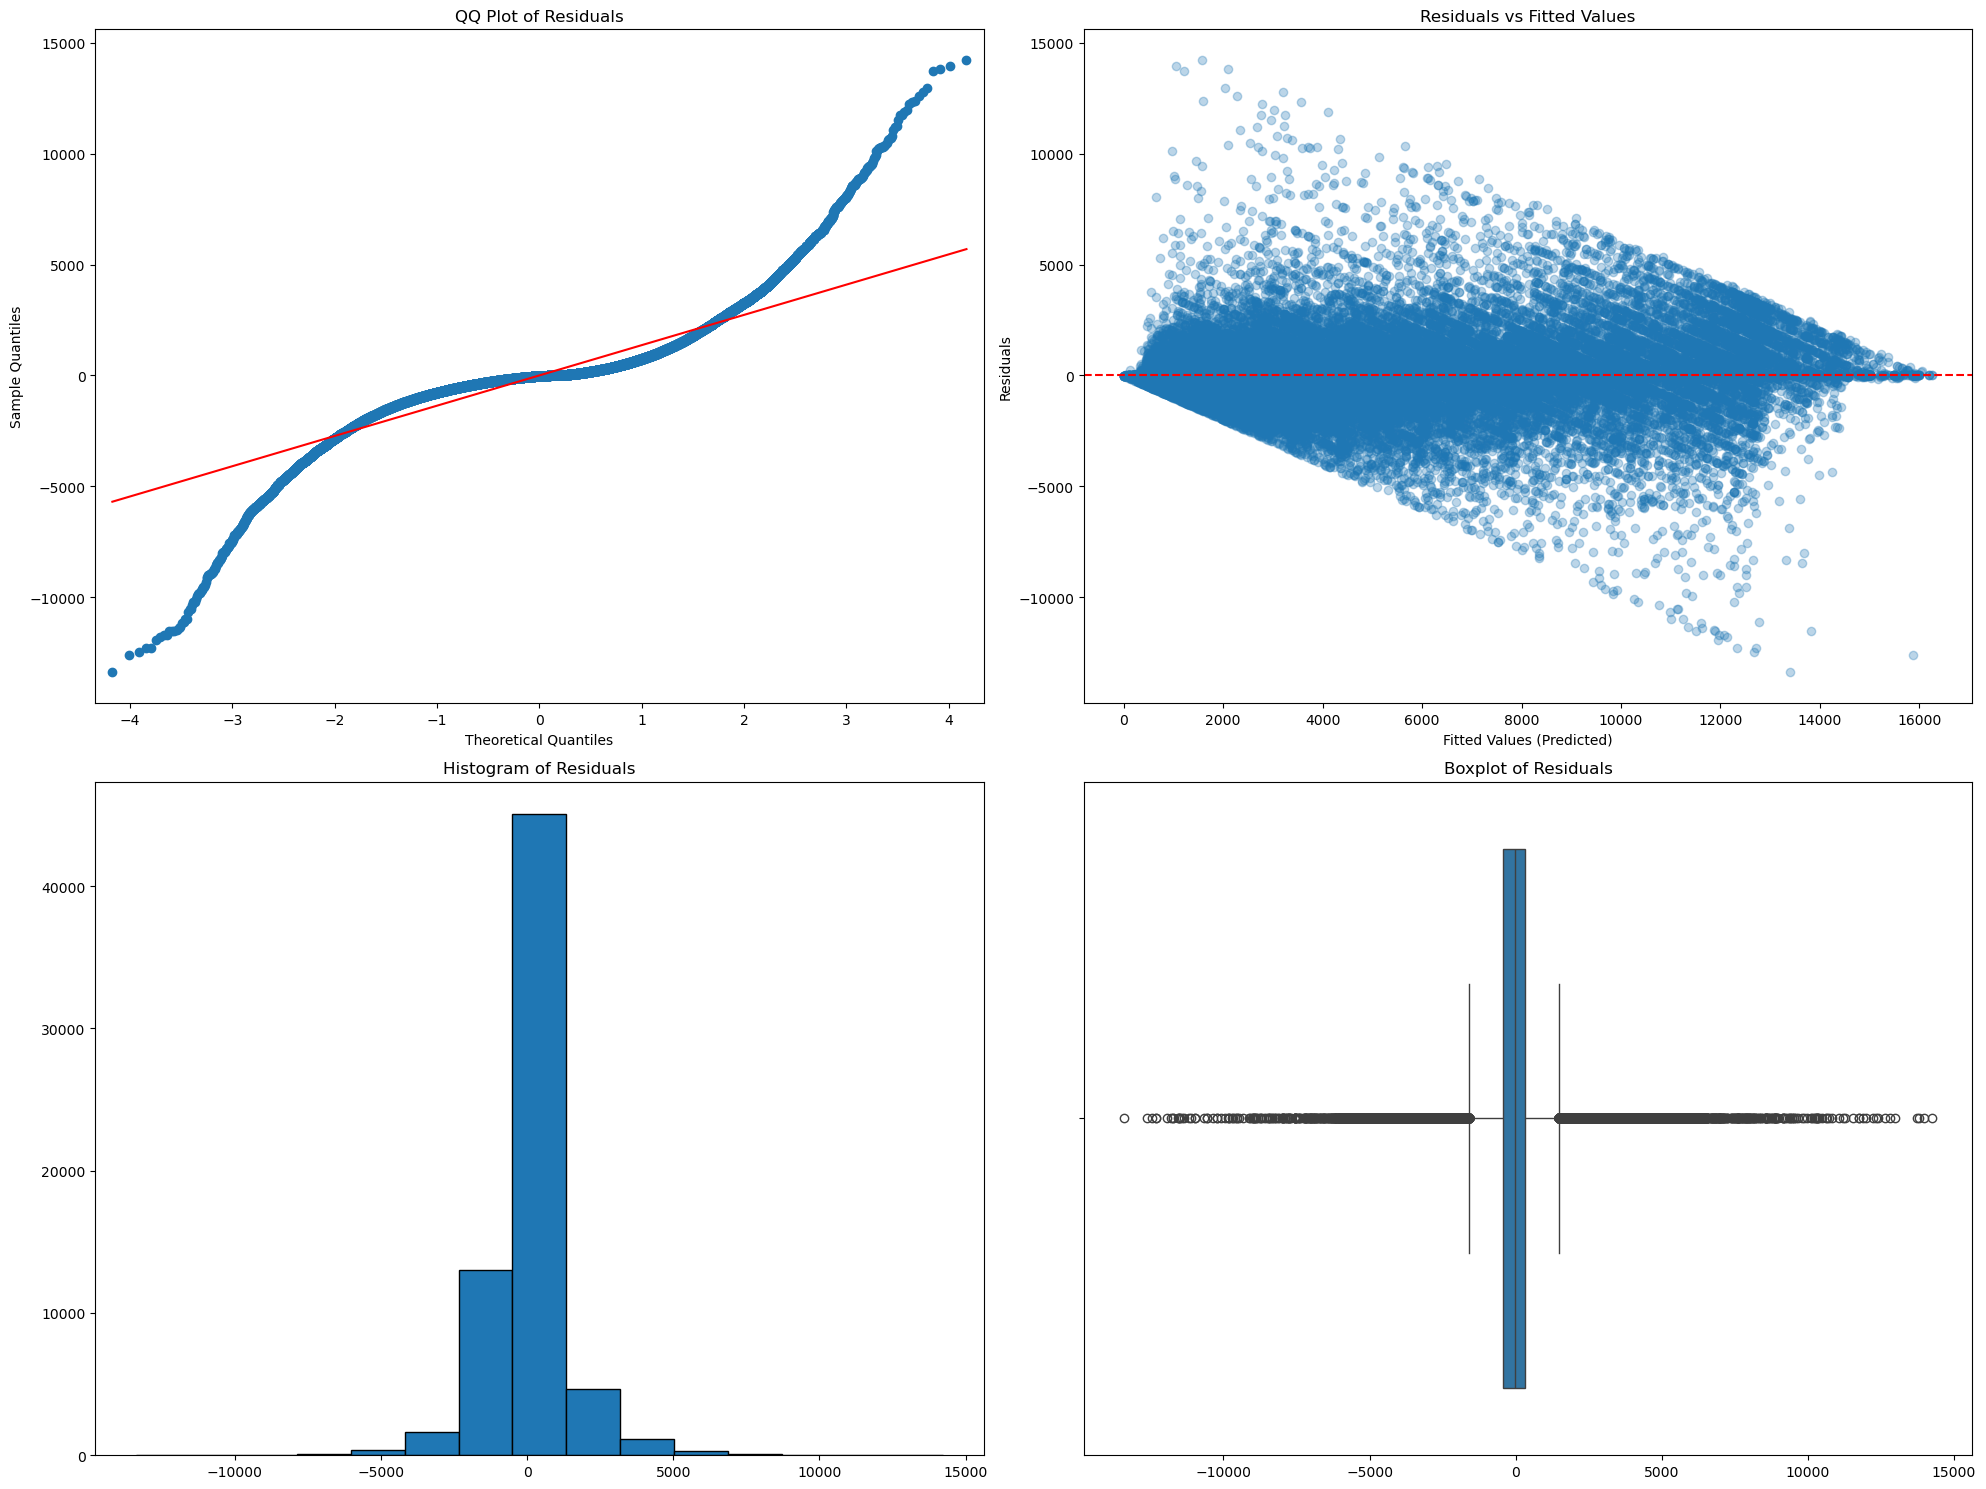

In [55]:
#  residuals and fitted from RF model
residuals = y_test - y_pred_test_rf
fitted = y_pred_test_rf

# Convert to numpy arrays if needed
residuals = np.array(residuals)
fitted = np.array(fitted)

#  Start plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 15))

# QQ Plot
sm.qqplot(residuals, line='s', ax=axs[0,0])
axs[0,0].set_title('QQ Plot of Residuals')

# Residuals vs Fitted
axs[0,1].scatter(fitted, residuals, alpha=0.3)
axs[0,1].axhline(y=0, color='red', linestyle='--')
axs[0,1].set_xlabel('Fitted Values (Predicted)')
axs[0,1].set_ylabel('Residuals')
axs[0,1].set_title('Residuals vs Fitted Values')

# Histogram of residuals
axs[1,0].hist(residuals, bins=15, edgecolor='black')
axs[1,0].set_title('Histogram of Residuals')

# Boxplot
sns.boxplot(x=residuals, ax=axs[1,1])
axs[1,1].set_title('Boxplot of Residuals')

plt.tight_layout()
plt.show()


The distribution shows a heavy right tail due to real extreme observations. These values reflect impactful events. These values should be modeled rather than removed.

In [56]:
lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

kf_r2 = r2_score(y_train, y_pred) 
kf_mae = mean_absolute_error(y_train, y_pred)

ols_r2 = model.rsquared
ols_mae = "N/A"

rf_r2 = r2_test_rf
rf_mae = mean_absolute_error(y_test, y_pred_test_rf)

results = {
    'Model': ['Linear Regression', 'K-Fold (5-Splits)', 'OLS (Statsmodels)', 'Random Forest'],
    'R2 Score': [lr_r2, kf_r2, ols_r2, rf_r2],
    'MAE (Error)': [lr_mae, kf_mae, ols_mae, rf_mae],
    'Residuals Nature': ['Linear/Assumed', 'Robust/Vetted', 'Statistical/Detailed', 'Non-Linear/Optimized']
}

comparison_df = pd.DataFrame(results)

print("=== Comparison Table ===")
display(comparison_df.sort_values(by='R2 Score', ascending=False))

=== Comparison Table ===


,Model,R2 Score,MAE (Error),Residuals Nature
3,Random Forest,0.874601,784.622694,Non-Linear/Optimized
0,Linear Regression,0.556970,1844.165573,Linear/Assumed
1,K-Fold (5-Splits),0.554176,1832.280042,Robust/Vetted
2,OLS (Statsmodels),0.544876,N/A,Statistical/Detailed


The comparison shows that the Random Forest model clearly outperforms all other models, achieving the highest R² score (0.87) and the lowest MAE, which indicates much more accurate price predictions. This confirms that non-linear relationships play an important role in determining used car prices.

Both Linear Regression and K-Fold Linear Regression show similar and moderate performance (R² ≈ 0.55), suggesting that linear models can capture general trends but fail to model complex patterns in the data. The OLS model provides detailed statistical insight but has the lowest explanatory power among the tested models.

Overall, Random Forest is the best-performing model for prediction, while linear and OLS models are more suitable for baseline analysis and interpretation.